In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Problem 1: Analysis of Numeric Variables

In this problem, your job is to analyze the following numeric variables in the dataset and their relationship with SalePrice.

```
['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
```

Firstly, we read the `train.csv` to get the data.

In [2]:
house_price = pd.read_csv("train.csv")
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Since we just want to consider `['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']` these 4 columns with `'SalePrice'`, we extract these columns.

In [3]:
variable_numeric = ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']

## a

Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?

We try to find the number of outliers for all variables.

In [4]:
house_price_numeric = house_price[variable_numeric]
Q1 = house_price_numeric.quantile(0.25)
Q3 = house_price_numeric.quantile(0.75)
IQR = Q3 - Q1
((house_price_numeric < Q1 - 1.5 * IQR) | (Q3 + 1.5 * IQR < house_price_numeric)).sum().sort_values(ascending=False)

LotArea        69
TotalBsmtSF    61
GrLivArea      31
GarageArea     21
dtype: int64

So `LotArea` has the maximum number of outliers as per box-plot. It has 69 outliers.

## b

Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?

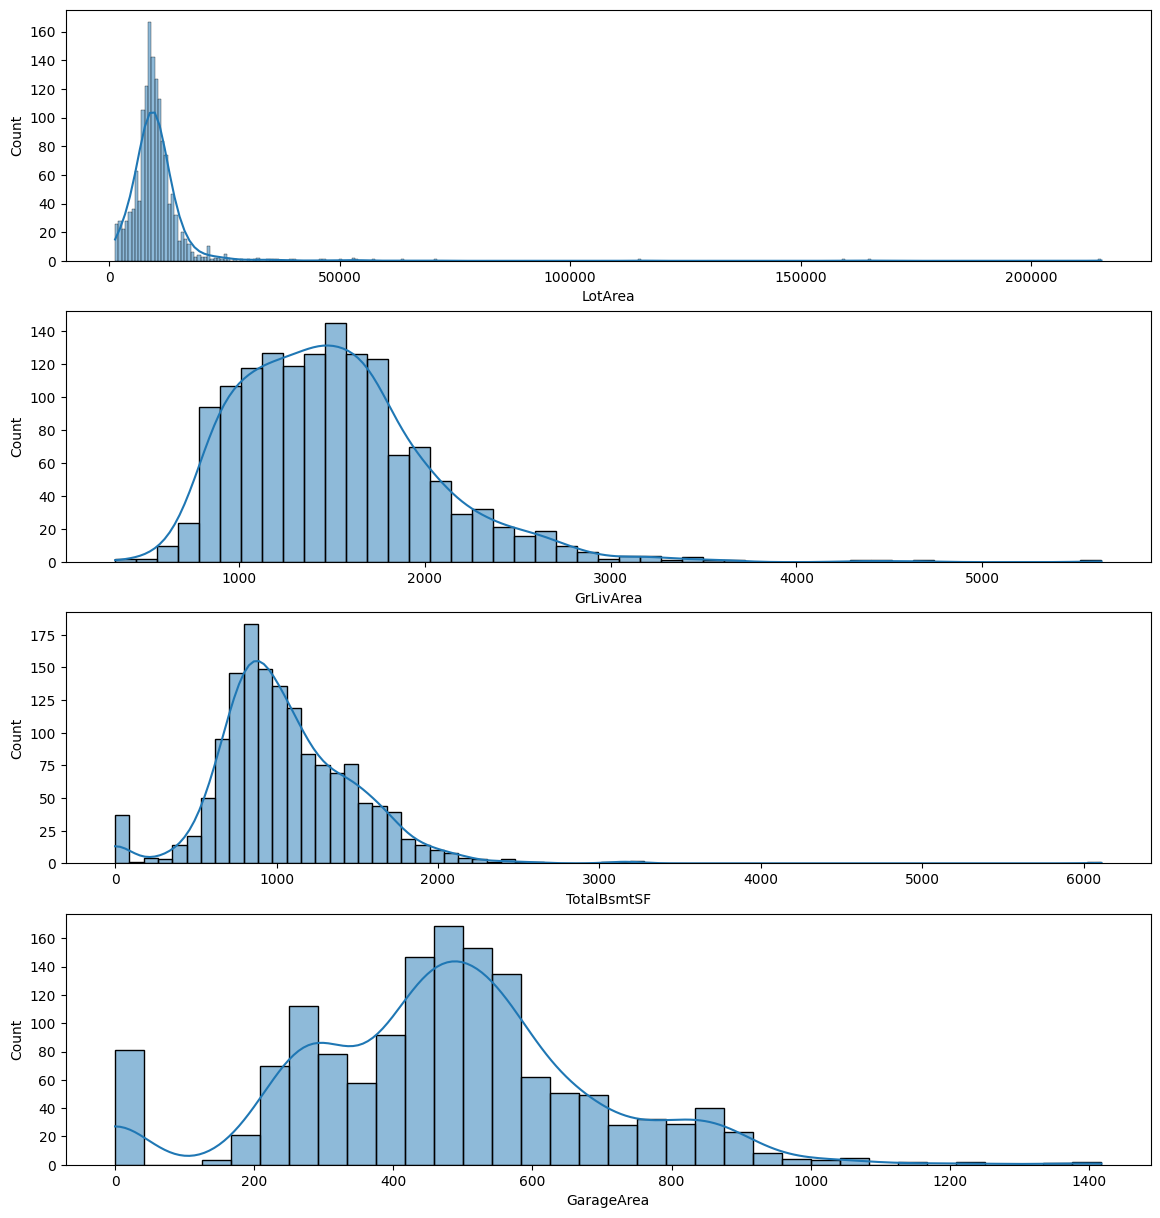

In [5]:
f, axes = plt.subplots(4, 1, figsize=(14, 15))
for index, var in enumerate(variable_numeric):
    sns.histplot(house_price_numeric[var], kde=True, ax=axes[index])

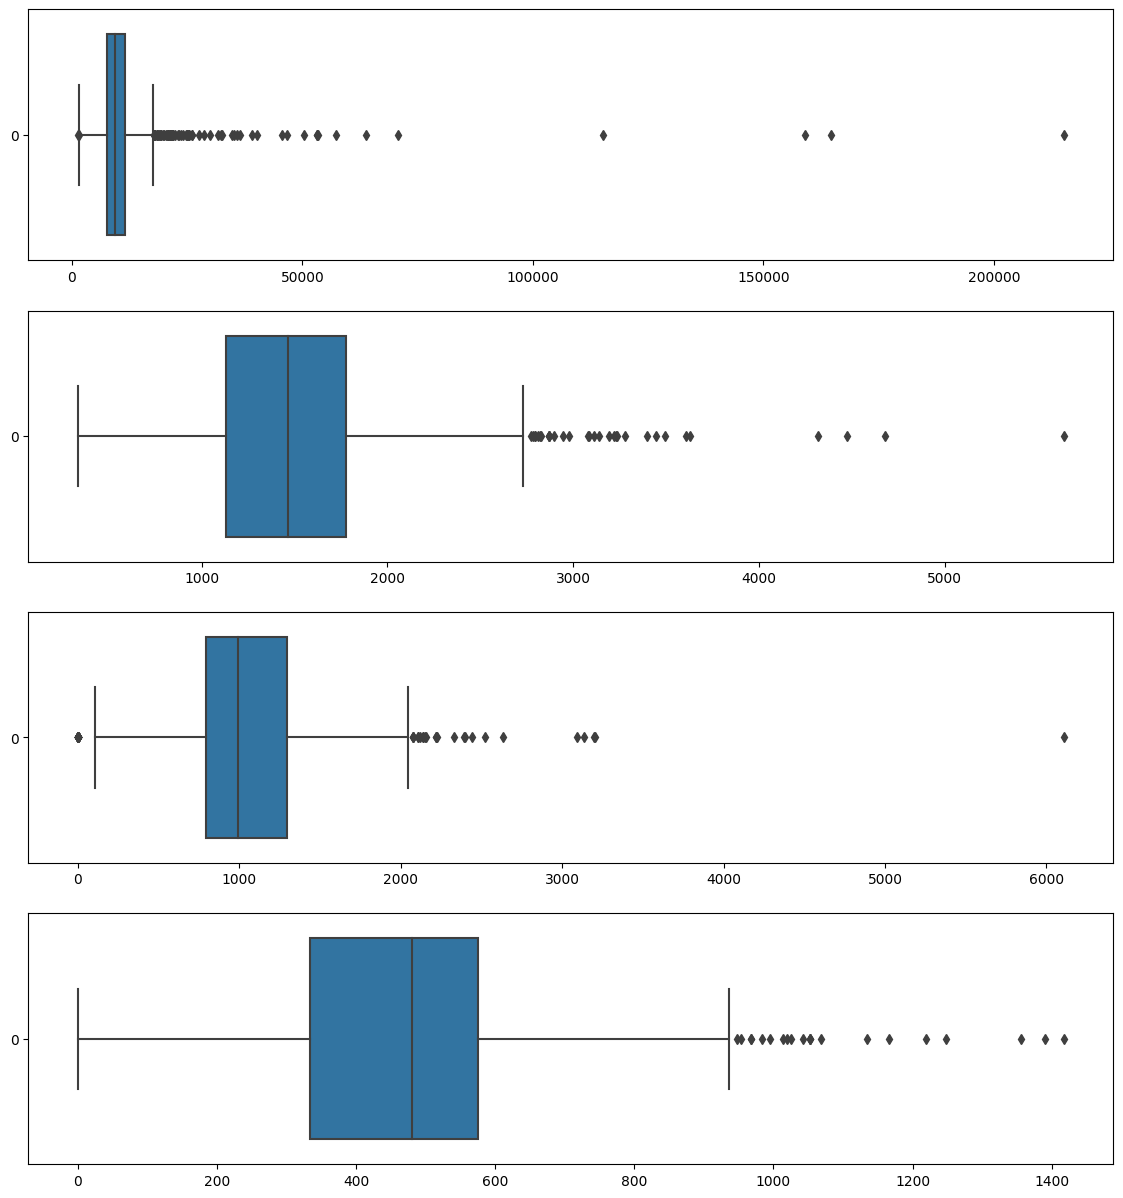

In [6]:
f, axes = plt.subplots(4, 1, figsize=(14, 15))
for index, var in enumerate(variable_numeric):
    sns.boxplot(house_price_numeric[var], ax=axes[index], orient="h")

From the graph we could find that `LotArea` is the most skewed from a regular normal distribution. And we could use code to verify.

In [7]:
house_price_numeric.skew().sort_values(ascending=False)

LotArea        12.207688
TotalBsmtSF     1.524255
GrLivArea       1.366560
GarageArea      0.179981
dtype: float64

So `LotArea` is the most skewed from a regular normal distribution. And the skew is positive.

## c

Choose the top two variables that you think will help us the most in predicting `'SalePrice'` of houses in this data.

In [8]:
house_price[variable_numeric + ["SalePrice"]].corr()["SalePrice"].sort_values(ascending=False)

SalePrice      1.000000
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
LotArea        0.263843
Name: SalePrice, dtype: float64

So the top two is `GrLivArea` and `GarageArea`.

---

# Problem 2: Analysis of Categorical Variables

In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.

```
['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
```

In [9]:
categorical_variables = ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']

## a

Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?

In [10]:
house_price_categorical = house_price[categorical_variables]
house_price_categorical.nunique().sort_values(ascending=False)

Neighborhood    25
MSSubClass      15
OverallQual     10
BldgType         5
dtype: int64

So `Neighborhood` has the highest number of levels.

In [11]:
house_price_categorical.mode()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,20,NAmes,1Fam,5


So the levels have the highest number of houses for `MSSubClass`, `Neighborhood`, `BldgType` and `OverallQual` are `20`, `NAmes`, `1Fam` and `5` separately.

## b

Choose the top two variables that you think will help us the most in predicting `'SalePrice'` of houses in this data.

Firstly we try to get the mean value of all the standard deviation for all levels of all variables.

In [12]:
for var in categorical_variables:
    print(var, house_price.groupby([var])["SalePrice"].std().mean())

MSSubClass 49546.49595389301
Neighborhood 48571.13084558381
BldgType 49515.925655035986
OverallQual 49593.53306663122


Then we try to get the `boxplot` of all these variables.

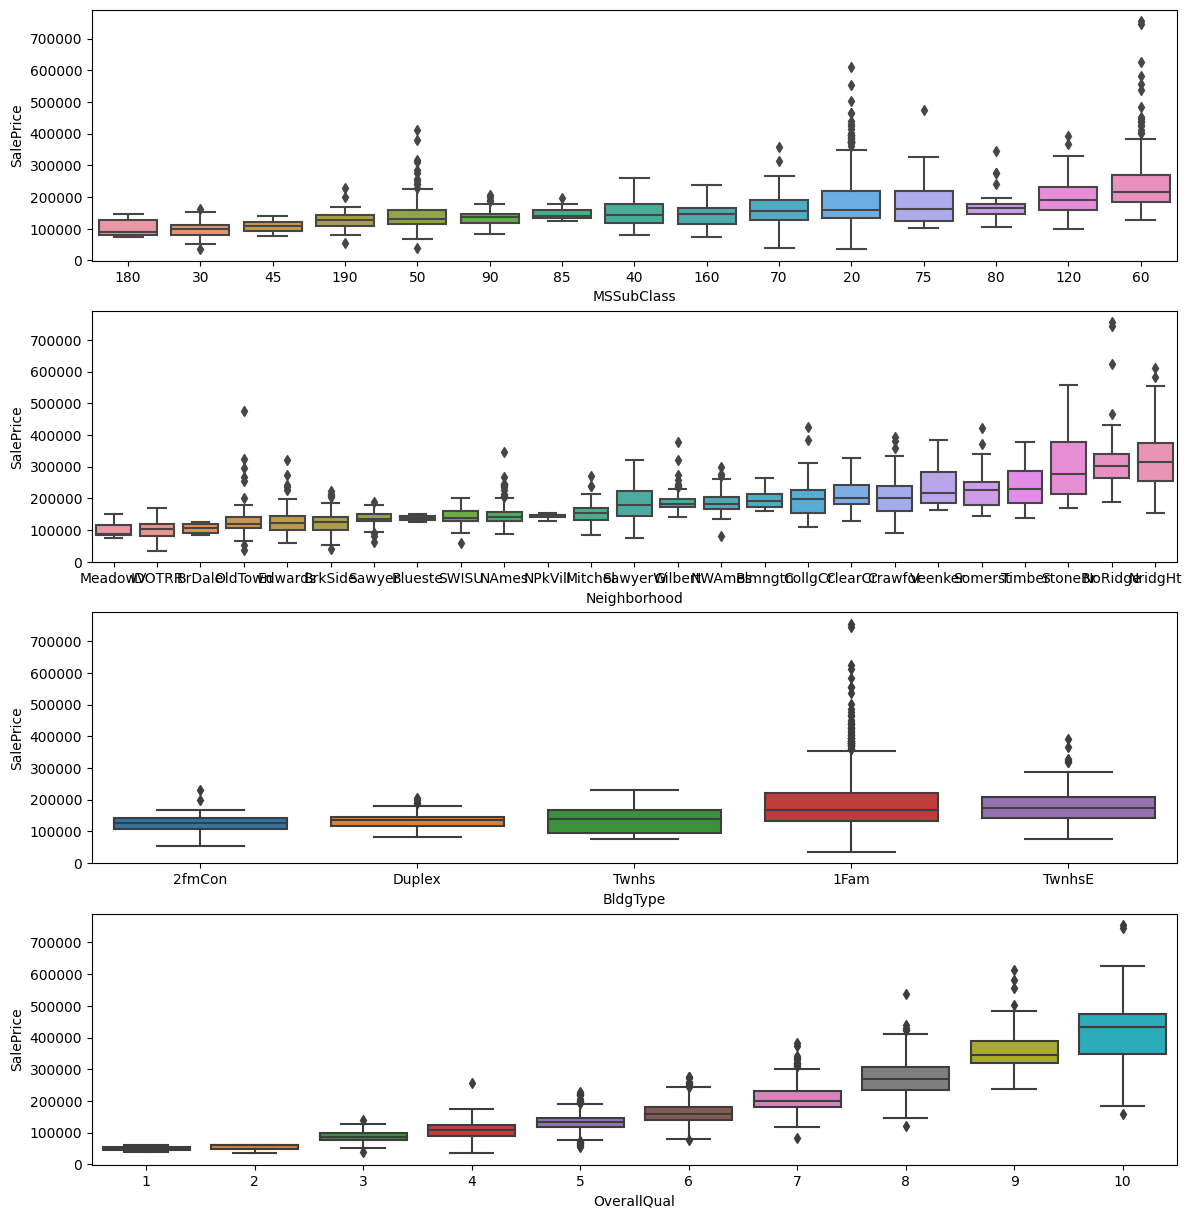

In [13]:
f, axes = plt.subplots(len(categorical_variables), 1, figsize=(14, 15))
for index, var in enumerate(categorical_variables):
    sns.boxplot(house_price, order=house_price.groupby([var])["SalePrice"].median().sort_values().index, x=var, y="SalePrice", ax=axes[index])

After considering various conditions, I think that using `Neighborhood` and `OverallQual` are the best.

# Problem 3: Interesting Questions for EDA

Choose any ONE of the following questions to answer. You may always try out the other one at home if you want.

## a

Does the `SalePrice` of a house get affected by whether it has a Garage or not? Justify your answer using EDA.

We split the data according to whether there is a garage or not.

In [14]:
house_no_garage = house_price[house_price["GarageType"].isnull()]["SalePrice"]
house_with_garage = house_price[house_price["GarageType"].isnull() == False]["SalePrice"]

Then we draw boxplot for these two data sets.

<AxesSubplot: >

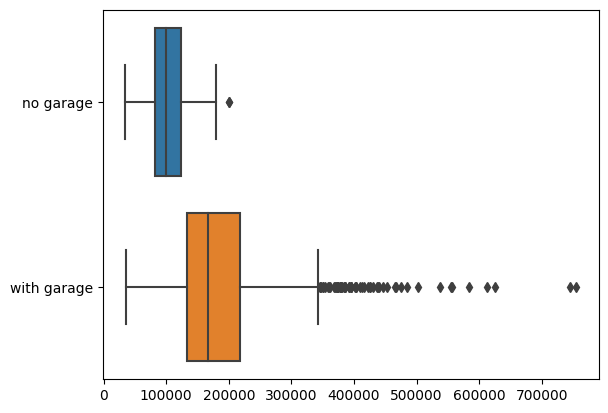

In [15]:
sns.boxplot(pd.concat([house_no_garage, house_with_garage], keys=["no garage", "with garage"], axis="columns"), orient="h")

In [16]:
house_with_garage.describe()

count      1379.00000
mean     185479.51124
std       79023.89060
min       35311.00000
25%      134000.00000
50%      167500.00000
75%      217750.00000
max      755000.00000
Name: SalePrice, dtype: float64

In [17]:
house_no_garage.describe()

count        81.000000
mean     103317.283951
std       32815.023389
min       34900.000000
25%       82500.000000
50%      100000.000000
75%      124000.000000
max      200500.000000
Name: SalePrice, dtype: float64

We found that having a garage may make the house price higher.

## b

Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.

We try to get the `jointplot` for `YearRemodAdd` and `SalePrice`.

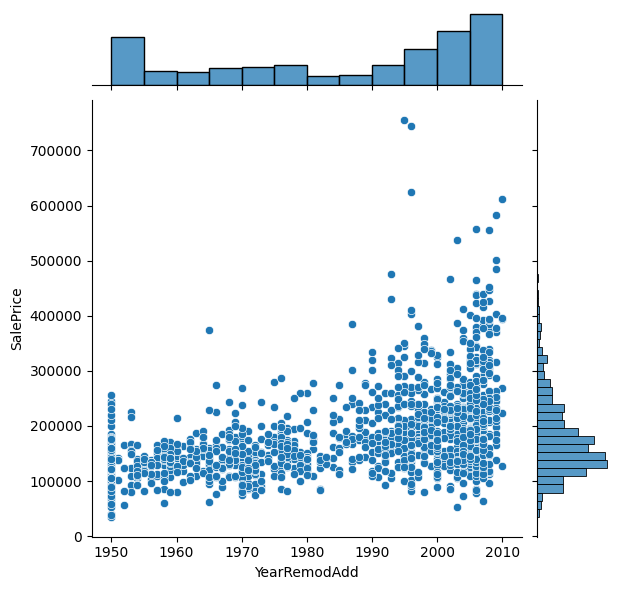

In [18]:
sns.jointplot(house_price, x="YearRemodAdd", y="SalePrice")

Then we try to calculate the correlation coefficient of the two varibles.

<AxesSubplot: >

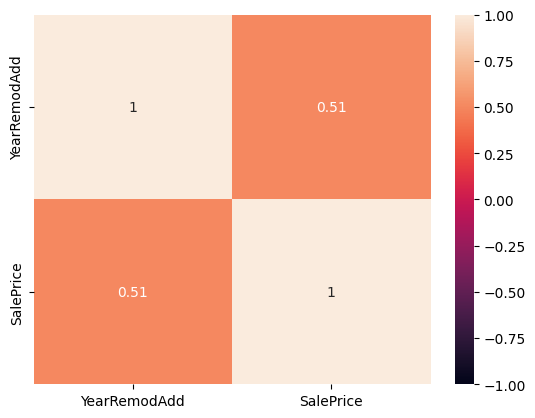

In [19]:
sns.heatmap(house_price[["YearRemodAdd", "SalePrice"]].corr(), vmin=-1, vmax=1, annot=True)

Then we try to get mean and medium value of `SalePrice` with `YearRemodAdd` increasing.

In [20]:
relation = house_price[["YearRemodAdd", "SalePrice"]].groupby(["YearRemodAdd"]).describe()
relation.head()

SalePrice                                                   \
                 count           mean           std       min       25%   
YearRemodAdd                                                              
1950             178.0  117463.056180  39306.143137   34900.0   91850.0   
1951               4.0  129975.000000  18694.094433  102000.0  128925.0   
1952               5.0  110398.600000  42510.180073   55993.0   82000.0   
1953              10.0  147640.000000  48205.075805   79900.0  113250.0   
1954              14.0  121142.857143  19492.038386   93000.0  110250.0   

                                            
                   50%       75%       max  
YearRemodAdd                                
1950          115000.0  136875.0  256000.0  
1951          138450.0  139500.0  141000.0  
1952          123500.0  124500.0  166000.0  
1953          152250.0  164500.0  225000.0  
1954          118500.0  131875.0  165000.0

<AxesSubplot: xlabel='YearRemodAdd', ylabel="('SalePrice', 'mean')">

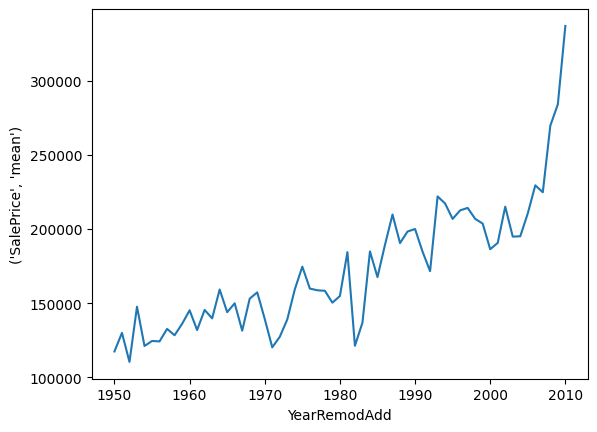

In [21]:
sns.lineplot(relation, x="YearRemodAdd", y=('SalePrice', 'mean'))

<AxesSubplot: xlabel='YearRemodAdd', ylabel="('SalePrice', '50%')">

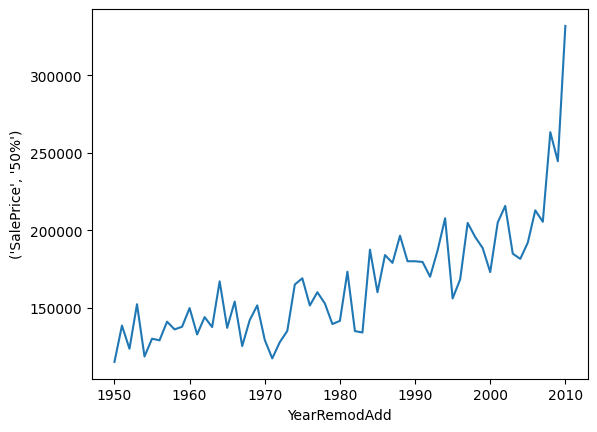

In [22]:
sns.lineplot(relation, x="YearRemodAdd", y=('SalePrice', '50%'))

So, we found that housing prices have a certain positive correlation with how recently it got Remodeled.